In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [20]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [21]:
df.shape

(546, 12)

In [22]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [24]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [25]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [26]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Linear Regression using Normal Equation

In [132]:
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']

In [133]:
print(x.shape, y.shape)

(546, 1) (546,)


In [134]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
w

array([12.23055227])

In [135]:
h = np.dot(x,w)
h.shape

(546,)

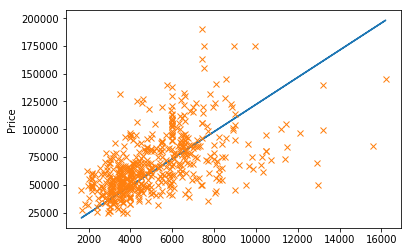

In [136]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()

In [137]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))

Score using naive Linear Regression: 0.2836899349357931


In [138]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
print("Score using scikit-learn: " + str(clf.score(x,y)))

Score using scikit-learn: 0.28707700259705604


# Gradient Descent

In [139]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [140]:
# Normalizing x and y
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [141]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 1)
y.shape: (546,)
m: 546
n: 1
x.shape after appending a column for bias: (546, 2)


In [149]:

y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))
print("")
print("Result for different values of alpha -")

alpha = 0.001 # Learning rate
epsilon = 0.00000001
log1 = np.array([])
log2 = np.array([])
log3 = np.array([])
while(alpha < 1):
    J_prev=100
    J=0
    iterations = 0
    temp = np.zeros((n+1,1))
    w = np.zeros((1,n+1))
    while(abs(J_prev-J) > epsilon):
        h = np.dot(x,w.T)
        for i in range(n+1):
            temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
        for i in range(n+1):
            w[:,i] = temp[i]
        J_prev = J
        J = (1/(2*m))*np.sum(np.square(h-y))
        if(alpha == 0.001):
            log1 = np.append(log1, J)
        if(alpha == 0.01):
            log2 = np.append(log2, J)
        if(alpha == 0.1):
            log3 = np.append(log3, J)
        iterations+=1
    if(alpha == 0.001):
        w1 = w 
        t1 = iterations
    if(alpha == 0.01):
        w2 = w 
        t2 = iterations
    if(alpha == 0.1):
        w3 = w 
        t3 = iterations
    print(" alpha = ",alpha," cost = ",J," iterations = ",iterations)
    alpha = alpha*(10)

x.shape: (546, 2)
w.shape: (1, 2)
y.shape: (546, 1)

Result for different values of alpha -
 alpha =  0.001  cost =  0.009557659297892762  iterations =  60515
 alpha =  0.01  cost =  0.00934263334908514  iterations =  11554
 alpha =  0.1  cost =  0.0093211327268669  iterations =  1706


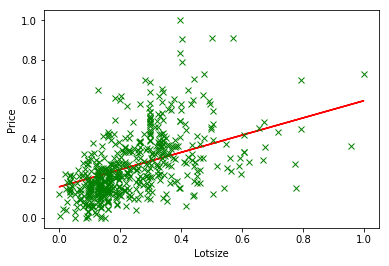

In [143]:
# Hypothesis for alpha = 0.001
w = w1
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

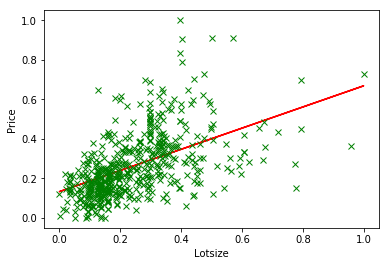

In [144]:
# Hypothesis for alpha = 0.01
w = w2
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

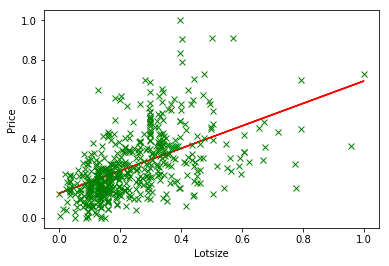

In [145]:
# Hypothesis for alpha = 0.1
w = w3
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

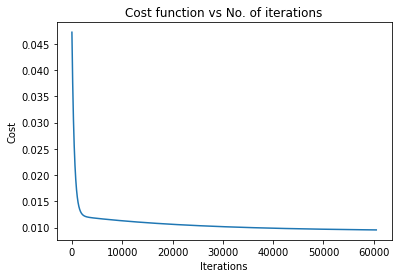

In [146]:
#plot for alpha == 0.001
log = log1
it = np.arange(t1)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

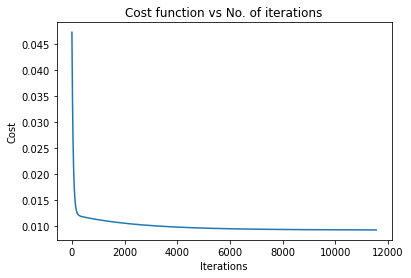

In [147]:
#plot for alpha == 0.01
log = log2
it = np.arange(t2)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

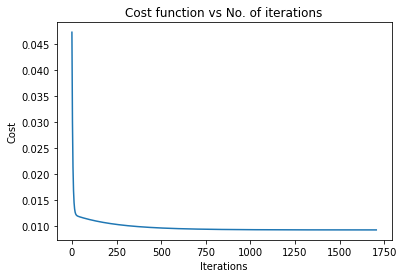

In [148]:
#plot for alpha == 0.1
log = log3
it = np.arange(t3)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

# Conclusion

# Normal Equation Using Regularisation

In [93]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [94]:
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']
lamda = 70

In [95]:
w = np.dot(np.linalg.inv(np.dot(x.T,x) + lamda),np.dot(x.T,y))
w

array([12.23055222])

In [96]:
h = np.dot(x,w)
h.shape

(546,)

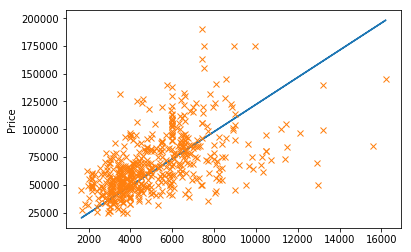

In [97]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()

In [29]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))

Score using naive Linear Regression: 0.2836899348237601


In [30]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
print("Score using scikit-learn: " + str(clf.score(x,y)))

Score using scikit-learn: 0.28707700259705604


# Gradient Descent using Regularisation

In [31]:
df.head()
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']

In [32]:
# Normalizing x and y
x = (x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))
y = (y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

In [33]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
lamda = 70
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 1)
y.shape: (546,)
m: 546
n: 1
x.shape after appending a column for bias: (546, 2)


In [34]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))

alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))

iterations = 0
t = 10000
log = np.array([])
while(iterations<t):
    h = np.dot(x,w.T)
    for i in range(1):
        temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(2,n+1):
        temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0) + lamda*w[:,i])
    for i in range(n+1):
        w[:,i] = temp[i]
    J = (1/(2*m))*(np.sum(np.square(h-y)) + lamda*np.sum(np.multiply(w,w)))
    log = np.append(log, J)
    iterations+=1

x.shape: (546, 2)
w.shape: (1, 2)
y.shape: (546, 1)


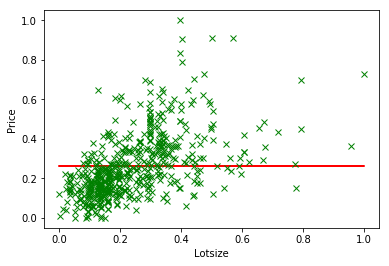

In [35]:
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

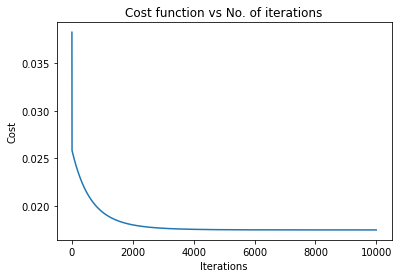

In [36]:
it = np.arange(t)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [37]:
log.min()

0.01744955913163936

# CONCLUSION

The value of lamda for which we are getting the best fitting is between 20 to 100.
For values of lamda greater than 200 the data is overfitted.